# EDA
This document include some investigate to the dataset

In [1]:
# import part
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the data
# load the data
csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")
# csv.info()

C:\Users\29425\AppData\Local\Temp\ipykernel_1800\2617869814.py:3: DtypeWarning: Columns (0,2,15,16,35) have mixed types. Specify dtype option on import or set low_memory=False.
  csv = pd.read_csv("./data/dft-road-casualty-statistics-accident-1979-2021.csv")


In [3]:
csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703911 entries, 0 to 8703910
Data columns (total 36 columns):
 #   Column                                       Dtype  
---  ------                                       -----  
 0   accident_index                               object 
 1   accident_year                                int64  
 2   accident_reference                           object 
 3   location_easting_osgr                        float64
 4   location_northing_osgr                       float64
 5   longitude                                    float64
 6   latitude                                     float64
 7   police_force                                 int64  
 8   accident_severity                            int64  
 9   number_of_vehicles                           int64  
 10  number_of_casualties                         int64  
 11  date                                         object 
 12  day_of_week                                  int64  
 13  time        

In [24]:
# filter the year from 2011 to 2021
sub_csv = csv.query("accident_year > 2010")

In [25]:
sub_csv.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

## function area

In [161]:
# plot the bar chart
def plot_bar(list, title, catag_boolen):
    fig, ax = plt.subplots()
    ax.ticklabel_format(style='plain')
    
    x = list.iloc[:, 0]
    y = list.iloc[:, 1]
    if catag_boolen:
        for index in range(len(x)):
            x[index] = str(x[index])
    bar = plt.bar(x, y)
    plt.bar_label(bar, fmt="%i", label_type="edge")
    plt.title(title)
    
    plt.show()

In [162]:
# get the value statistic
def get_accident_number_by(value_string):
    try:
        sub_csv = sub_csv[[value_string]]
    except:
        print("the value you input is not valid")
        return
    count = sub_csv.groupby([value_string]).size().reset_index(name='counts')
    return count

In [163]:
# get_bar_by_factors
def get_bar_by_factors(factor, inCata):
    try:
        return plot_bar(get_accident_number_by(factor), inCata)
    except:
        print("please check the input")
        return 

In [164]:
light_csv = sub_csv[["light_conditions"]]
weather_csv = sub_csv[["weather_conditions"]]
road_csv = sub_csv[["road_surface_conditions"]]
urban_csv = sub_csv[["urban_or_rural_area"]]

light_count = light_csv.groupby("light_conditions").size().reset_index(name='counts')
weather_count = weather_csv.groupby("weather_conditions").size().reset_index(name='counts')
road_count = road_csv.groupby("road_surface_conditions").size().reset_index(name='counts')
urban_count = urban_csv.groupby("urban_or_rural_area").size().reset_index(name='counts')


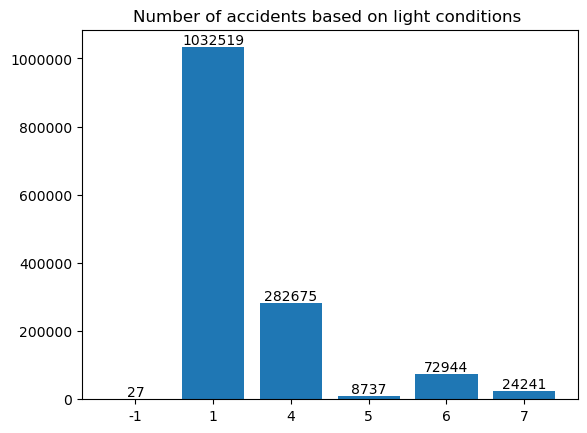

In [165]:
# light
plot_bar(light_count, "Number of accidents based on light conditions ", True)


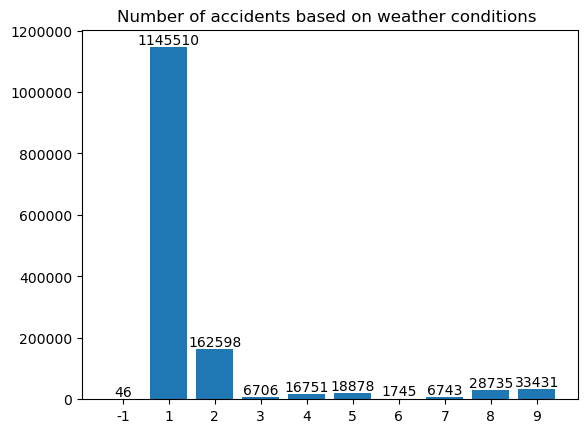

In [166]:
# weather 
plot_bar(weather_count, "Number of accidents based on weather conditions ", True)

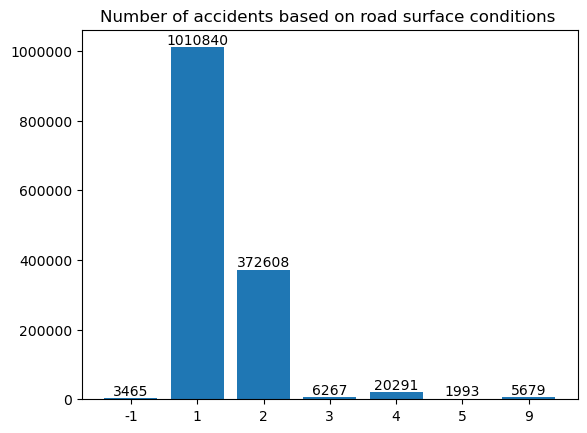

In [167]:
# road 
plot_bar(road_count, "Number of accidents based on road surface conditions ", True)

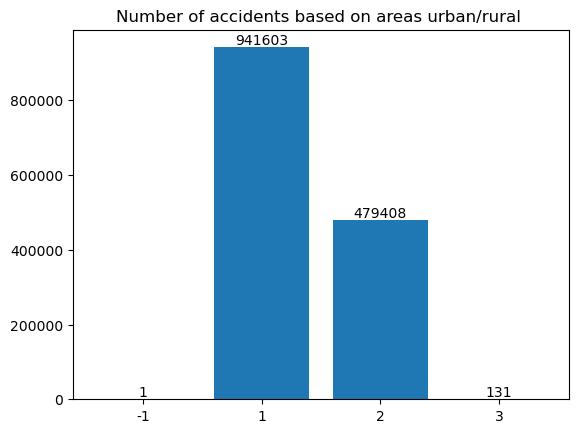

In [168]:
# urban 
plot_bar(urban_count, "Number of accidents based on areas urban/rural ", True)